In [94]:
import pandas as pd
import matplotlib.pyplot as plt 

In [169]:
data= pd.read_csv("affirm_deny.csv")
data.head()

,input_date,target
0,ஆமாம்,affirm
1,ஓகே,affirm
2,சரி,affirm
3,சரி சரி,affirm
4,சரிங்க,affirm


In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [97]:
data.isnull().sum()

input_date    0
target        0
dtype: int64

In [98]:
data["input_date"].mode()[0]

'ஆமா '

In [170]:
x=data.columns
y=data.iloc[:,-1].values
# print(y)
data=data.drop("target",axis=1)
x=data.iloc[:,:].values
# print(x)
x=le.fit_transform(x)
y=le.fit_transform(y)
print(x)
print(y)

[  9  75  88  94 100  14  73   9   4   4  91  12  92  97  17  19   0   4
 111 111  88  88  62  11  69  81 121  89   1  18  63   7   8  95  76  85
 104 106 105  69 103   5  98   1  99  18  64  65  77  80  76  95   3  13
  16  84 108 109 102  15  74  10   1   8   6  71 107  90   2   5 124 125
 124 125 121  83 123  79  82  96  68  78 126 122 120  70  86  87  93 101
  66  67  21  37  24  43  22  40 115 114  61  28  49 116  48  72  54  58
  51  52  31  51 112 117  56  38  41  42  21  37  24  43  22  40 115 114
 113  20  26  27  29  32  33  36  39  44  45  46  47 110 116 118  30  34
  23  25  60  28  49  35  50  53  55  57  59  21  37  24  43  22  40 115
 114 119]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

/home/shalini/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [159]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [160]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [161]:
x_train=x_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [162]:
X = x_test.reshape(-1,1)

In [163]:
y_pred=model.predict(X)

In [164]:
y_pred

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0])

In [165]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.8727272727272727

In [166]:

ip=pd.DataFrame({'input_date':["ஆமாம்"]})
ip=le.fit_transform(ip)
print(ip)
ip=ip.reshape(-1,1)
pred=model.predict(ip)
pred

[0]


/home/shalini/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0])

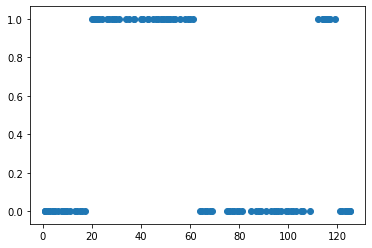

In [173]:
plt.scatter(x_train,y_train)